# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Unsupervised Learning Project RFM & Cohort Analysis</b></p>

This notebook focuses on an **Unsupervised Learning Final Project** involving **RFM (Recency, Frequency, Monetary) Analysis** and **Cohort Analysis**. The primary goal is to uncover customer behavior patterns and segment customers for actionable insights. By leveraging unsupervised learning techniques and data analysis, this project aims to provide a comprehensive understanding of customer engagement and purchasing trends.

### Objectives:
1. **Data Exploration:** Perform exploratory data analysis (EDA) to clean and understand the dataset, addressing missing values and anomalies.
2. **RFM Analysis:** Segment customers based on their recency, frequency, and monetary value scores to identify customer groups for targeted marketing strategies.
3. **Cohort Analysis:** Analyze customer retention and purchasing patterns over time by grouping customers into cohorts based on their first purchase.
4. **Visualization:** Use advanced visualization techniques to present findings, including heatmaps, dendrograms, and clustering results.

#### Dataset Overview:
The dataset includes the following key columns:
- **InvoiceNo:** Transaction invoice number.
- **StockCode:** Unique product identifier.
- **Description:** Product description.
- **Quantity:** Number of units purchased in the transaction.
- **InvoiceDate:** Date and time of the transaction.
- **UnitPrice:** Price per unit of the product.
- **CustomerID:** Unique identifier for each customer.
- **Country:** Country where the transaction occurred.


This project demonstrates the power of unsupervised learning and cohort-based approaches in deriving valuable customer insights, enhancing decision-making, and improving business strategies.


# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno
from yellowbrick.cluster import KElbowVisualizer  
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.preprocessing import scale, StandardScaler

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree  

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # default: 20
pd.set_option('display.max_rows', 500)    # default: 10
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df0 = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Dataset is composed of 541909 rows and 8 columns. When going through the columns, we notice that we have some missing values in the CustomerID column, as it only has 406829 values. Also the column Description has missing values. So, that should be considered when applying exploration to our dataset.

In [4]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.000,9.552,-80995.000,1.000,3.000,10.000,80995.000,218.081
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.000,4.611,-11062.060,1.250,2.080,4.130,38970.000,96.760
CustomerID,406829.000,15287.691,12346.000,13953.000,15152.000,16791.000,18287.000,1713.600


In [5]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


In [6]:
df.duplicated().sum()

5268

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(536641, 8)

<Axes: >

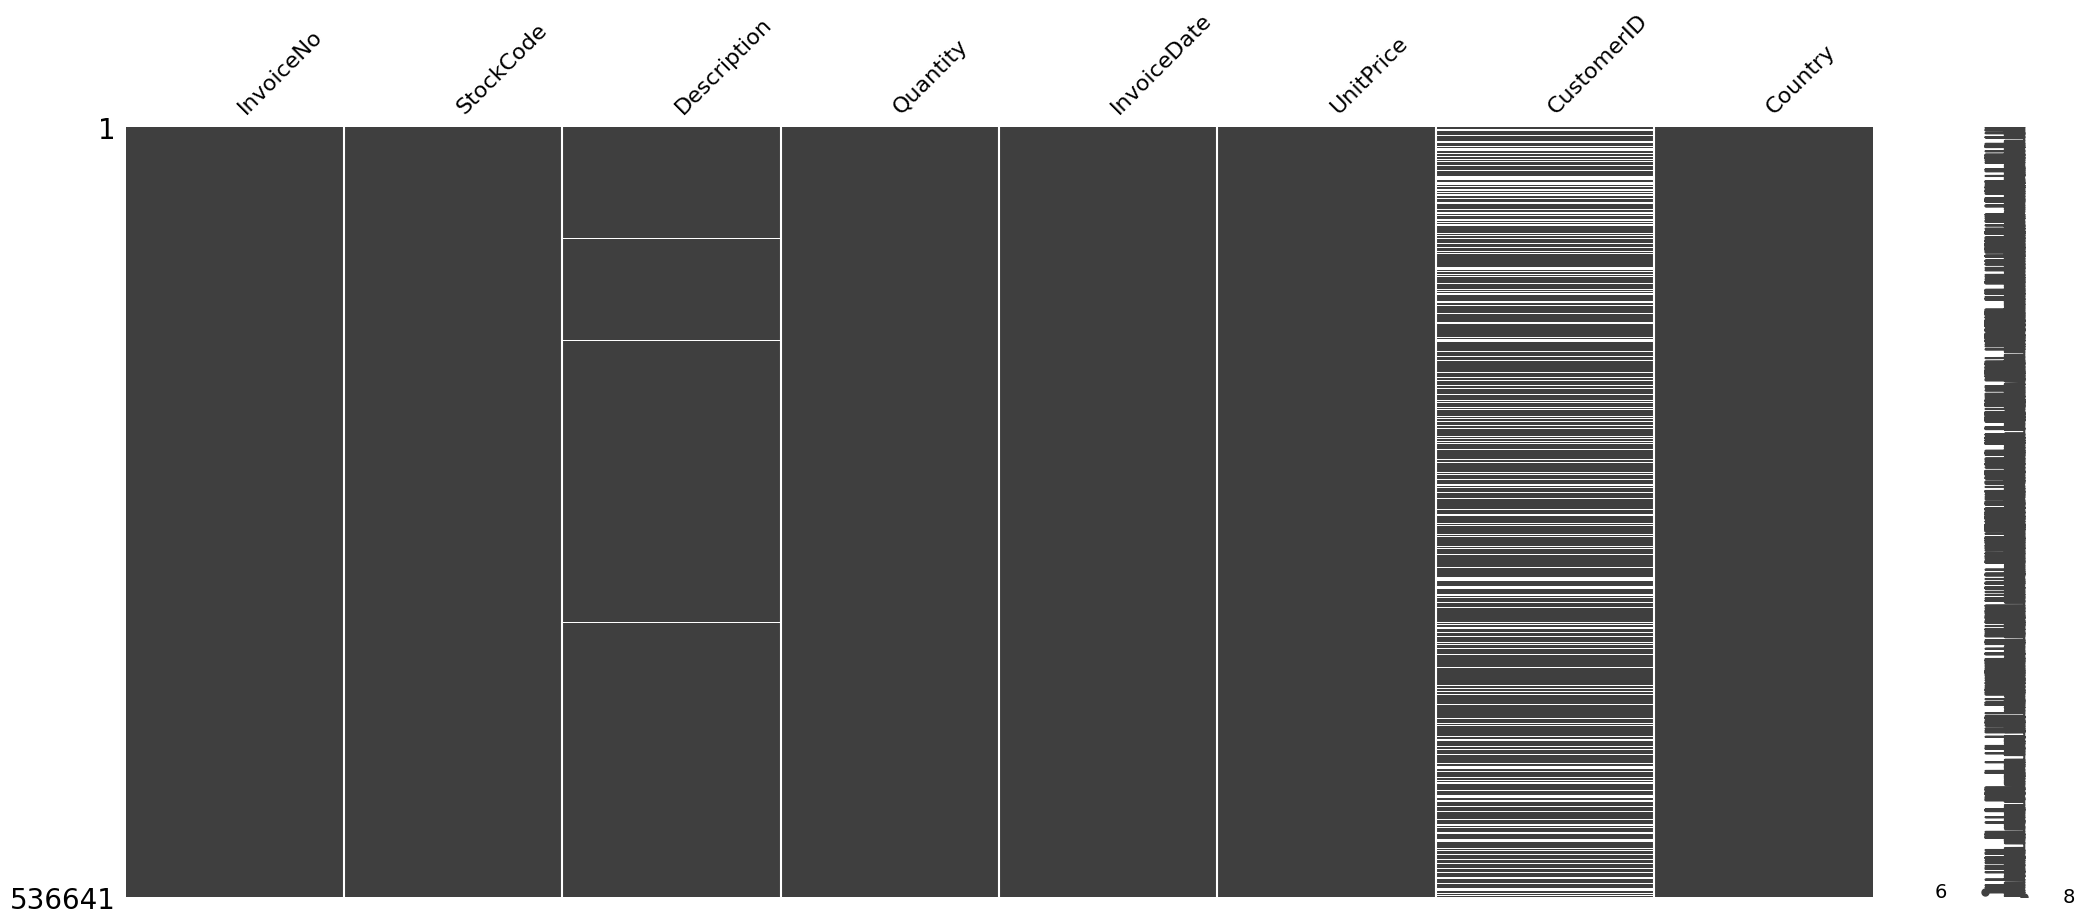

In [9]:
msno.matrix(df)

In [10]:
def summary(df):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.select_dtypes(include=[int, float]).min()  # Only numeric columns
    Max = df.select_dtypes(include=[int, float]).max()  # Only numeric columns
    Uniques = df.apply(lambda x: x.nunique())
    Missing_Values = df.isnull().sum()
    print('Data shape:', df.shape)
    Summary = pd.DataFrame({
        'Type': Types,
        'Count': Counts,
        'Unique': Uniques,
        'Missing': Missing_Values,
        'Min': Min,
        'Max': Max
    })
    print('___________________________')
    return Summary

summary(df)

Data shape: (536641, 8)
___________________________


,Type,Count,Unique,Missing,Min,Max
Country,object,536641,38,0,NaN,NaN
CustomerID,float64,401604,4372,135037,12346.000,18287.000
Description,object,535187,4223,1454,NaN,NaN
InvoiceDate,datetime64[ns],536641,23260,0,NaN,NaN
InvoiceNo,object,536641,25900,0,NaN,NaN
Quantity,int64,536641,722,0,-80995.000,80995.000
StockCode,object,536641,4070,0,NaN,NaN
UnitPrice,float64,536641,1630,0,-11062.060,38970.000


We notice that we have some negative values in our dataset. This could mean that these quantities (with corresponding UnitPrice and Quantity values) was returned or cancelled.

In [11]:
# Some InvoiceNo values start with the letter "c" = cancelled. 

# Getting cancelled transactions
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.000,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.000,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.000,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom


In [12]:
# Checking how many rows of our dataframe contain cancelled orders
cancelled_orders.shape

(9251, 8)

In [13]:
# Number of orders per customer
customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
customers.head()

,InvoiceNo
CustomerID,
12346.000,2
12347.000,7
12348.000,4
12349.000,1
12350.000,1


In [14]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,4372.000,5.075,9.339,1.000,1.000,3.000,5.000,248.000


In [15]:
# Number of unique items per order

Items = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
Items.columns=['Number of Unique Items']
Items.head()

,Number of Unique Items
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


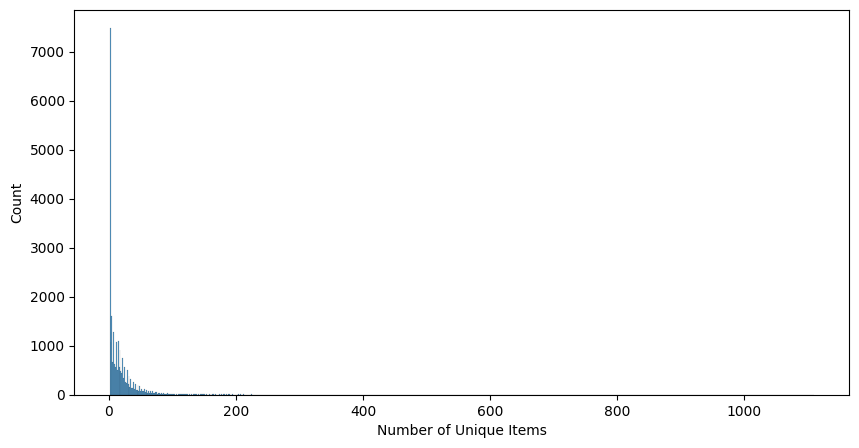

In [16]:
# Visualize the variable productsNumber distribution
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.histplot(Items['Number of Unique Items'], ax=ax)
plt.show()

In [17]:
df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [19]:
df.groupby('Country')['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False)

,Country,Total_Price
36,United Kingdom,8167128.184
24,Netherlands,284661.540
10,EIRE,262993.380
14,Germany,221509.470
13,France,197317.110
0,Australia,137009.770
33,Switzerland,56363.050
31,Spain,54756.030
3,Belgium,40910.960
32,Sweden,36585.410


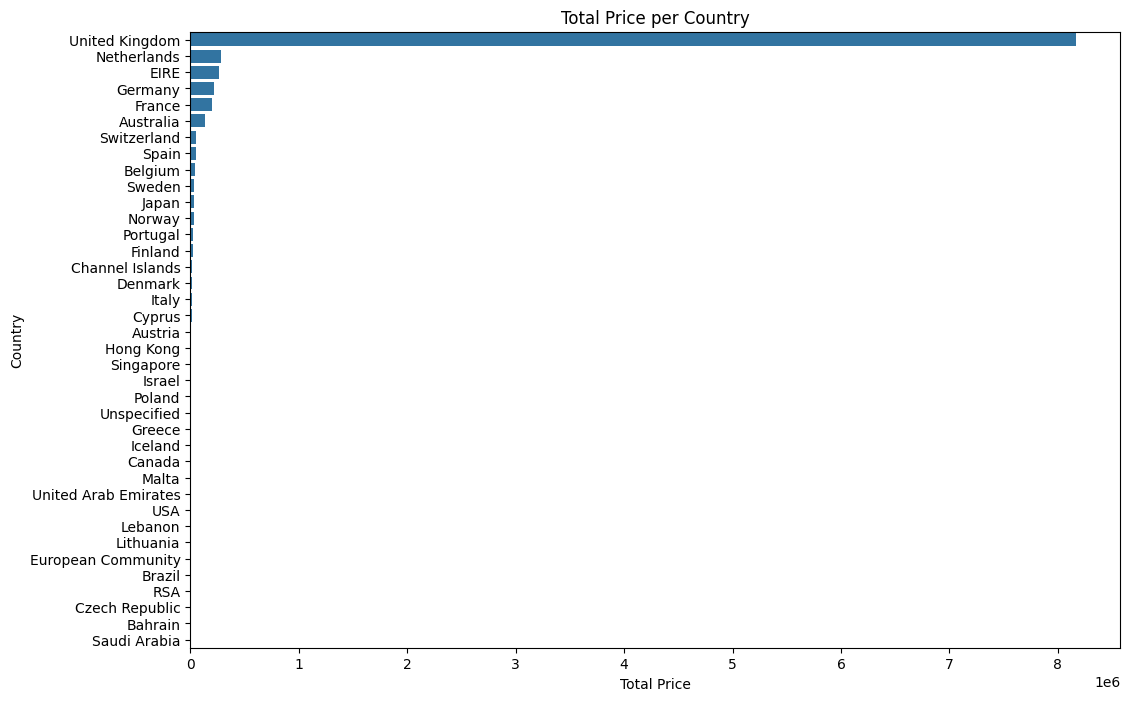

In [20]:
# Grouping the data by Country and sums the Total_Price for each country.
country_total_price = df.groupby('Country')['Total_Price'].sum().reset_index()
country_total_price = country_total_price.sort_values(by='Total_Price', ascending=False)

# Plotting the Total_Price per Country

plt.figure(figsize=(12, 8))
sns.barplot(data=country_total_price, x='Total_Price', y='Country')
plt.title('Total Price per Country')
plt.xlabel('Total Price')
plt.ylabel('Country')
plt.show()

In [21]:
# Exploring which products that are most bought by the customers
most_bought_products = df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
most_bought_products

,StockCode,Quantity
1070,22197,56427
2622,84077,53751
3659,85099B,47260
3670,85123A,38811
2735,84879,36122
...,...,...
3283,79323LP,-2618
3286,79323W,-4838
3213,72140F,-5368
1828,23003,-8516


In [22]:
# Get the top 10 most preferred products
most_preferred_products = df['Description'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products Per Shop",
             labels={'x': 'Product', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

In [23]:
# Order of how many units of each product were purchased in total
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
...,...
Damaged,-7540
Printing smudges/thrown away,-9058
check,-12030


### Data Cleaning

Data cleaning is a crucial step in every EDA process. It involves identifying and handling errors, inconsistencies, and missing values in the dataset to ensure the data is accurate, complete, and reliable.

In [24]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
Total_Price         0
dtype: int64

In [25]:
# Delete rows without customer ID. Because we will make an analysis over customers.
# We also delete product information with empty rows under 1%.

df.dropna(inplace=True)

In [26]:
df.shape

(401604, 9)

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,401604.000,12.183,-80995.000,2.000,5.000,12.000,80995.000,250.283
InvoiceDate,401604,2011-07-10 12:08:23.848567552,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:40:00,2011-10-20 11:58:30,2011-12-09 12:50:00,NaN
UnitPrice,401604.000,3.474,0.000,1.250,1.950,3.750,38970.000,69.764
CustomerID,401604.000,15281.161,12346.000,13939.000,15145.000,16784.000,18287.000,1714.006
Total_Price,401604.000,20.614,-168469.600,4.250,11.700,19.800,168469.600,430.352


Max orders per customer is 248 and average is 5.

In [28]:
# date, month, week, time
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create 'date', 'month', 'week', and 'time' columns
df['Year'] = df['InvoiceDate'].dt.strftime('%Y')
df['Month'] = df['InvoiceDate'].dt.strftime('%B')
df['Day'] = df['InvoiceDate'].dt.strftime('%A')
df['Time'] = df['InvoiceDate'].dt.strftime('%H')

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,2010,December,Wednesday,08
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010,December,Wednesday,08
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,2010,December,Wednesday,08
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010,December,Wednesday,08
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010,December,Wednesday,08


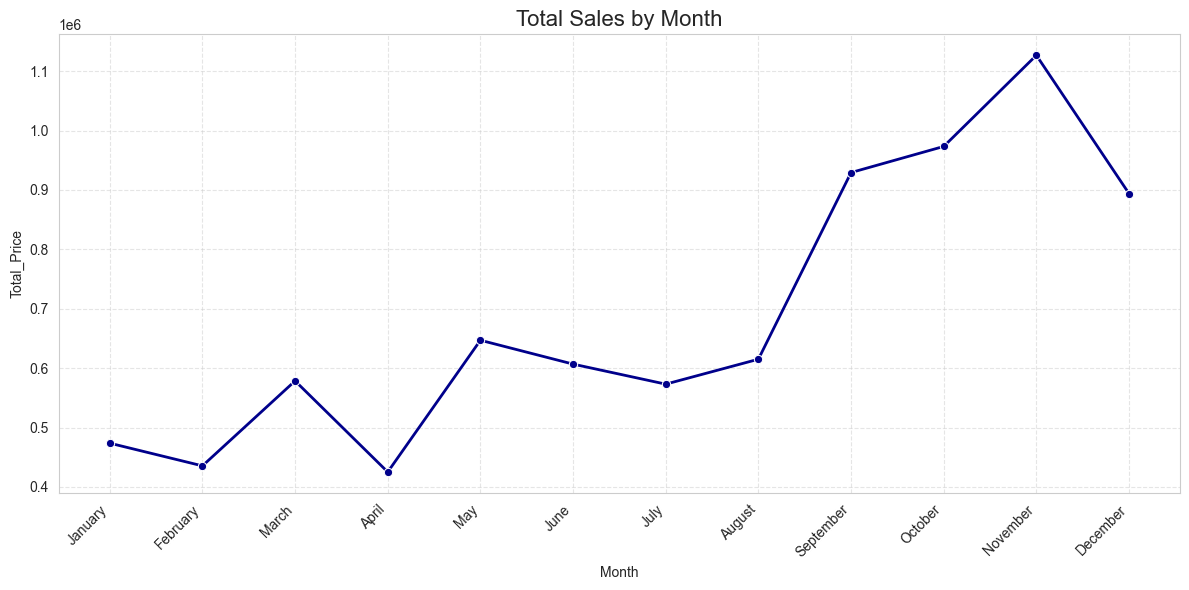

In [30]:
# Calculate the total price by month
df_months = df.groupby('Month').agg({'Total_Price': 'sum'}).reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_months['Month'] = pd.Categorical(df_months['Month'], categories=month_order, ordered=True)

# Set the style
sns.set_style("whitegrid")

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months, x='Month', y='Total_Price', marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

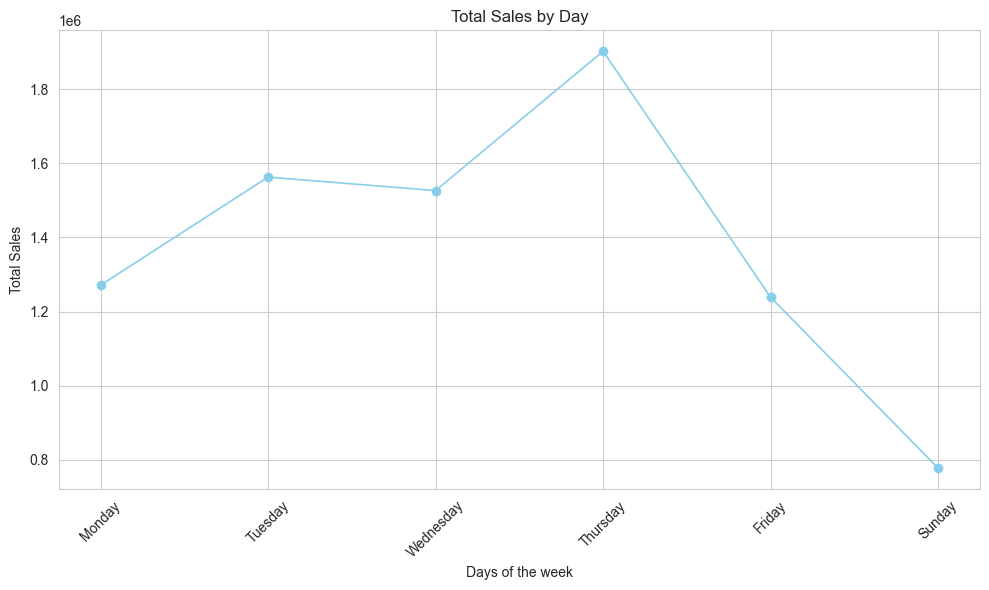

In [31]:
# Calculating total sales on a daily basis
df_day = df.groupby('Day').agg({'Total_Price': 'sum'}).reset_index()

# Reordering the table according to weekdays
df_day['Day'] = pd.Categorical(df_day['Day'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
df_day = df_day.sort_values('Day')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df_day['Day'], df_day['Total_Price'], marker='o', color='skyblue', linewidth=1.2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

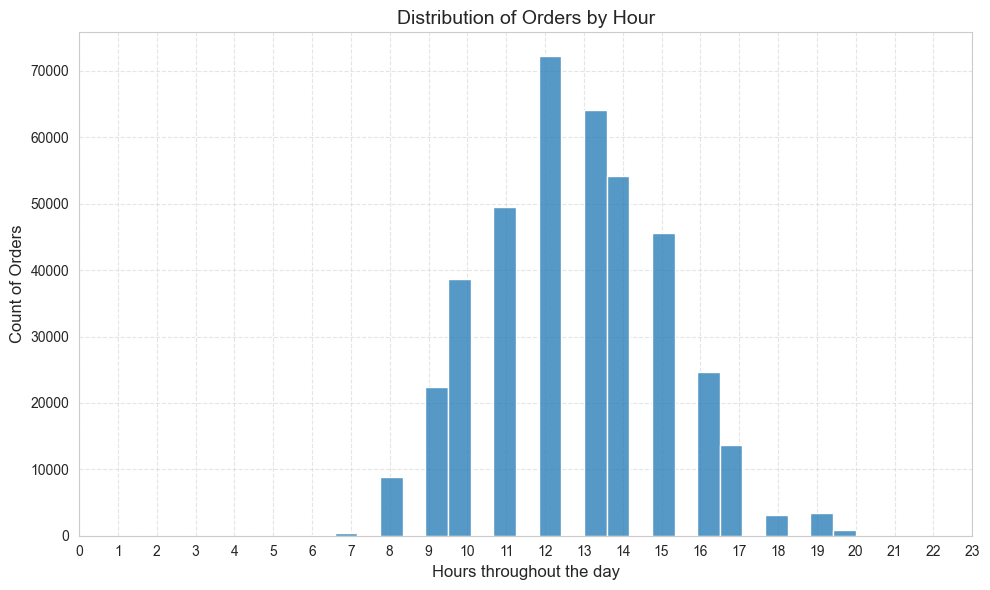

In [32]:

# Ensure the 'Time' column is in the correct 24-hour format (if not already)

df['Time'] = pd.to_datetime(df['Time'], format='%H').dt.hour  

# Set the style
sns.set_style("whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', bins=24,  kde=False)

# Customizing the plot
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)  # Ensure all 24 hours are shown
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.title('Distribution of Orders by Hour', fontsize=14)

plt.tight_layout()
plt.show()


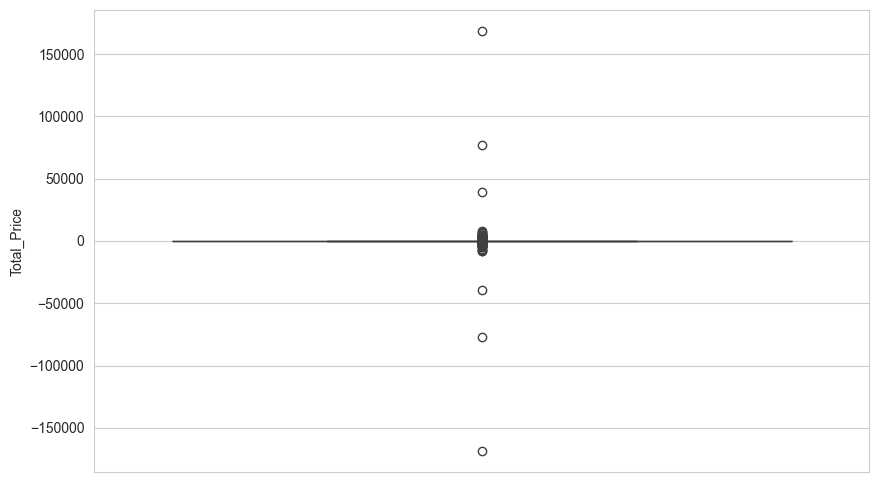

In [33]:
# Create a box plot
sns.boxplot(data=df, y='Total_Price')

# Display the plot
plt.show()

In [34]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,401604.000,12.183,-80995.000,2.000,5.000,12.000,80995.000,250.283
InvoiceDate,401604,2011-07-10 12:08:23.848567552,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:40:00,2011-10-20 11:58:30,2011-12-09 12:50:00,NaN
UnitPrice,401604.000,3.474,0.000,1.250,1.950,3.750,38970.000,69.764
CustomerID,401604.000,15281.161,12346.000,13939.000,15145.000,16784.000,18287.000,1714.006
Total_Price,401604.000,20.614,-168469.600,4.250,11.700,19.800,168469.600,430.352
Time,401604.000,12.731,6.000,11.000,13.000,14.000,20.000,2.288


In [35]:
summary(df)

Data shape: (401604, 13)
___________________________


,Type,Count,Unique,Missing,Min,Max
Country,object,401604,37,0,NaN,NaN
CustomerID,float64,401604,4372,0,12346.000,18287.000
Day,object,401604,6,0,NaN,NaN
Description,object,401604,3896,0,NaN,NaN
InvoiceDate,datetime64[ns],401604,20460,0,NaN,NaN
InvoiceNo,object,401604,22190,0,NaN,NaN
Month,object,401604,12,0,NaN,NaN
Quantity,int64,401604,436,0,-80995.000,80995.000
StockCode,object,401604,3684,0,NaN,NaN
Time,int32,401604,15,0,6.000,20.000


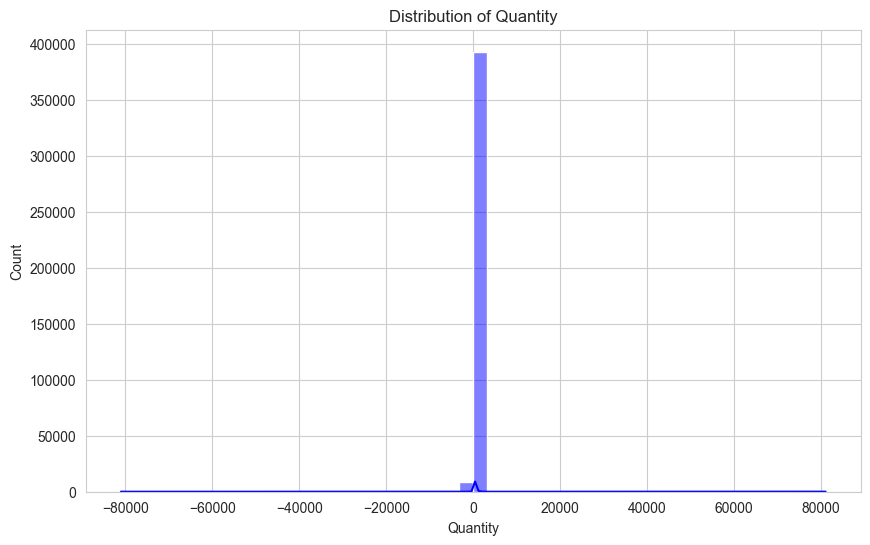

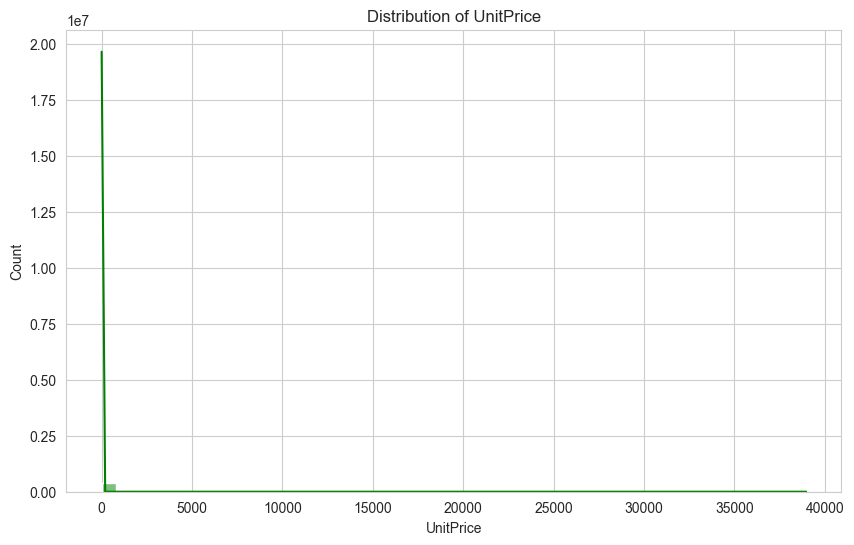

In [36]:
# Visualize distributions
sns.histplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.show()

sns.histplot(df['UnitPrice'], bins=50, kde=True, color='green')
plt.title('Distribution of UnitPrice')
plt.show()


### Outlier Identification
We will identify outliers using the zscore:


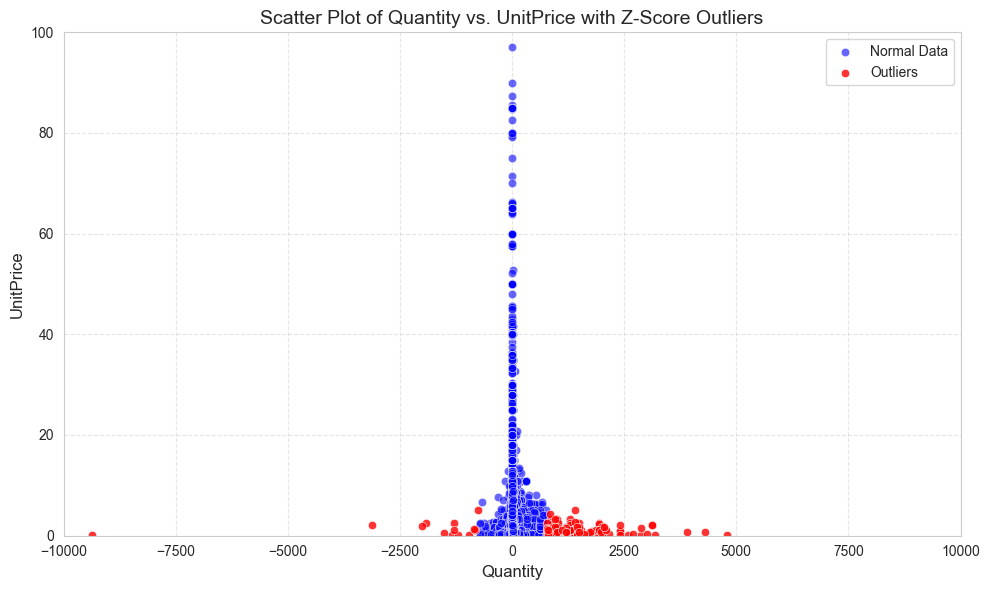

Outliers:
      InvoiceNo  Quantity  UnitPrice  zscore_quantity  zscore_unitprice
4287   C536757     -9360      0.030          -37.446            -0.049
4850    536809      1824      0.550            7.239            -0.042
4945    536830      2880      0.180           11.458            -0.047
4946    536830      1400      1.060            5.545            -0.035
4989    536835         1    295.000           -0.045             4.179


In [ ]:
# Calculate z-scores for Quantity and UnitPrice
df['zscore_quantity'] = zscore(df['Quantity'])
df['zscore_unitprice'] = zscore(df['UnitPrice'])

# Identify outliers using z-scores
outliers = df[(df['zscore_quantity'].abs() > 3) | (df['zscore_unitprice'].abs() > 3)]
normal_data = df[(df['zscore_quantity'].abs() <= 3) & (df['zscore_unitprice'].abs() <= 3)]

# Scatter plot for Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))

# Plot normal data
sns.scatterplot(data=normal_data, x='Quantity', y='UnitPrice', color='blue', label='Normal Data', alpha=0.6)

# Plot outliers
sns.scatterplot(data=outliers, x='Quantity', y='UnitPrice', color='red', label='Outliers', alpha=0.8)

# Adjust axes limits to focus on main data cluster
plt.xlim(-10000, 10000)  # Adjust Quantity range
plt.ylim(0, 100)        # Adjust UnitPrice range

# Add labels and title
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('UnitPrice', fontsize=12)
plt.title('Scatter Plot of Quantity vs. UnitPrice with Z-Score Outliers', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Display some outliers for further analysis
print("Outliers:\n", outliers[['InvoiceNo', 'Quantity', 'UnitPrice', 'zscore_quantity', 'zscore_unitprice']].head())


In [38]:
# Display detailed information about outliers for investigation
print(outliers.describe())
print(outliers[['InvoiceNo', 'Quantity', 'UnitPrice', 'zscore_quantity', 'zscore_unitprice']])


        Quantity                    InvoiceDate  UnitPrice  CustomerID  \
count    334.000                            334    334.000     334.000   
mean     640.880  2011-06-27 23:18:54.970060032    590.821   15093.814   
min   -80995.000            2010-12-02 14:23:00      0.000   12346.000   
25%       -1.000            2011-04-02 01:47:15      0.550   13027.000   
50%      771.000            2011-07-02 13:27:30      2.400   15098.000   
75%     1200.000            2011-10-11 11:15:00    539.935   16751.000   
max    80995.000            2011-12-09 10:28:00  38970.000   18133.000   
std     8605.122                            NaN   2345.182    1917.948   

       Total_Price    Time  zscore_quantity  zscore_unitprice  
count      334.000 334.000          334.000           334.000  
mean       524.613  12.722            2.512             8.419  
min    -168469.600   7.000         -323.663            -0.050  
25%       -247.325  11.000           -0.053            -0.042  
50%        38

In [39]:
# Cap Quantity
df['Quantity'] = df['Quantity'].clip(lower=-2500, upper=2500)

In [40]:
df.to_csv('OnlineRetailCleaned.csv', index=False)

# RFM Analysis

In [41]:
df = pd.read_csv('OnlineRetailCleaned.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Month,Day,Time,zscore_quantity,zscore_unitprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,2010,December,Wednesday,8,-0.025,-0.013
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010,December,Wednesday,8,-0.025,-0.001
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,2010,December,Wednesday,8,-0.017,-0.010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010,December,Wednesday,8,-0.025,-0.001
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010,December,Wednesday,8,-0.025,-0.001


In [42]:
# last transaction date
df["InvoiceDate"].max()

'2011-12-09 12:50:00'

In [43]:
import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Define the snapshot date (e.g., today or the last date in the dataset)
snapshot_date = dt.datetime(2011, 12, 10)

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'Total_Price': 'sum'                                     # Monetary
}).reset_index()

# Rename columns for clarity
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Price': 'Monetary'
}, inplace=True)


In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.000,325,2,0.000
1,12347.000,2,7,4310.000
2,12348.000,75,4,1797.240
3,12349.000,18,1,1757.550
4,12350.000,310,1,334.400


In [45]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4372.000,15299.678,1722.391,12346.000,13812.750,15300.500,16778.250,18287.000
Recency,4372.000,91.581,100.772,0.000,16.000,50.000,143.000,373.000
Frequency,4372.000,5.075,9.339,1.000,1.000,3.000,5.000,248.000
Monetary,4372.000,1893.531,8218.696,-4287.630,291.795,644.070,1608.335,279489.020


In [46]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine scores into an overall RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [47]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.000,325,2,0.000,1,2,1,121
1,12347.000,2,7,4310.000,5,4,5,545
2,12348.000,75,4,1797.240,2,3,4,234
3,12349.000,18,1,1757.550,4,1,4,414
4,12350.000,310,1,334.400,1,1,2,112


           Segment  Count  Percentage
0    New Customers   1378      31.519
1             Lost   1053      24.085
2  Loyal Customers    701      16.034
3        Champions    434       9.927
4        Promising    327       7.479
5   Need Attention    289       6.610
6   About to Sleep    190       4.346


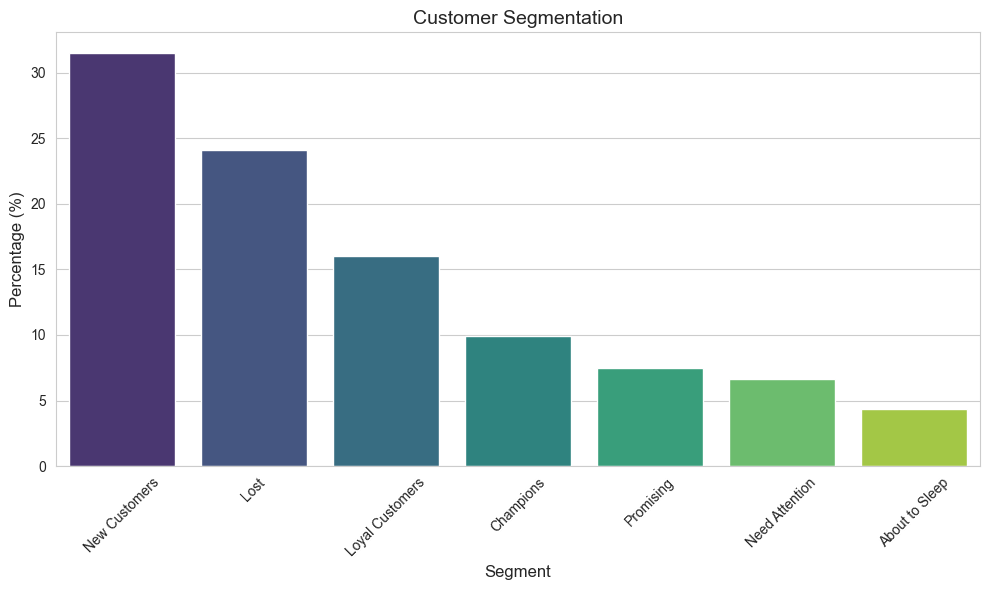

In [ ]:
import pandas as pd

# Define segmentation rules based on RFM scores
def segment_customer(row):
    if row['R_Score'] == 5 and row['F_Score'] == 5:
        return 'Champions'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Loyal Customers'
    elif row['R_Score'] >= 4 and row['F_Score'] <= 2:
        return 'Promising'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 4:
        return 'Need Attention'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'Lost'
    elif row['R_Score'] == 3 and row['F_Score'] == 3:
        return 'About to Sleep'
    else:
        return 'New Customers'

# Apply segmentation to RFM DataFrame
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Count customers in each segment and calculate percentages
segment_summary = rfm['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']
segment_summary['Percentage'] = (segment_summary['Count'] / rfm.shape[0]) * 100

# Display as a DataFrame
print(segment_summary)

# Optional: Create a bar chart to visualize the segments

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_summary, x='Segment', y='Percentage', palette='viridis')
plt.title('Customer Segmentation', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Mapping of RFM_Score to their corresponding customer segments
RFM_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_risk',
    r'[1-2]5': "Shouldn't_loose",
    r'3[1-2]': 'About_to_sleep',
    r'33': 'Need_attention',
    r'[3-4][4-5]': 'Loyal_customers',
    r'41': 'Promising',
    r'51': 'New_customers',
    r'[4-5][2-3]': 'Potential_loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
# Create a combined RFM score column
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)
# Map RFM scores to segments
rfm['Segment'] = rfm['RFM_Score'].replace(RFM_map, regex=True)

# Analyze and summarize segments
segment_summary = rfm['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']
segment_summary['Percentage'] = (segment_summary['Count'] / rfm.shape[0]) * 100

# Display the segment summary
print(segment_summary)

               Segment  Count  Percentage
0          Hibernating   1053      24.085
1      Loyal_customers    795      18.184
2            Champions    665      15.210
3              At_risk    603      13.792
4  Potential_loyalists    490      11.208
5       About_to_sleep    369       8.440
6       Need_attention    190       4.346
7            Promising     97       2.219
8      Shouldn't_loose     68       1.555
9        New_customers     42       0.961


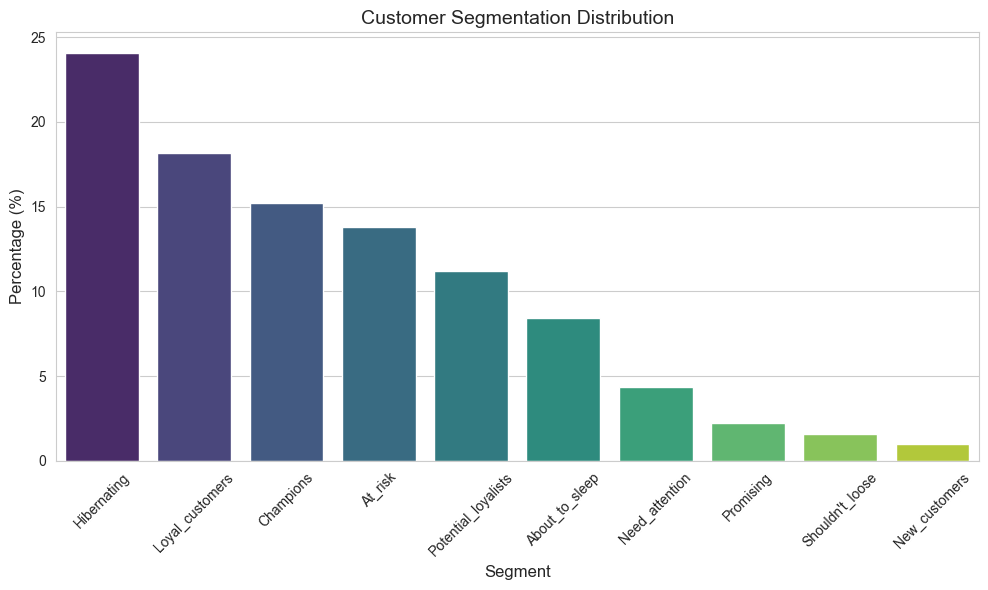

In [51]:
# Visualize segment distribution (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_summary, x='Segment', y='Percentage', palette='viridis')
plt.title('Customer Segmentation Distribution', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

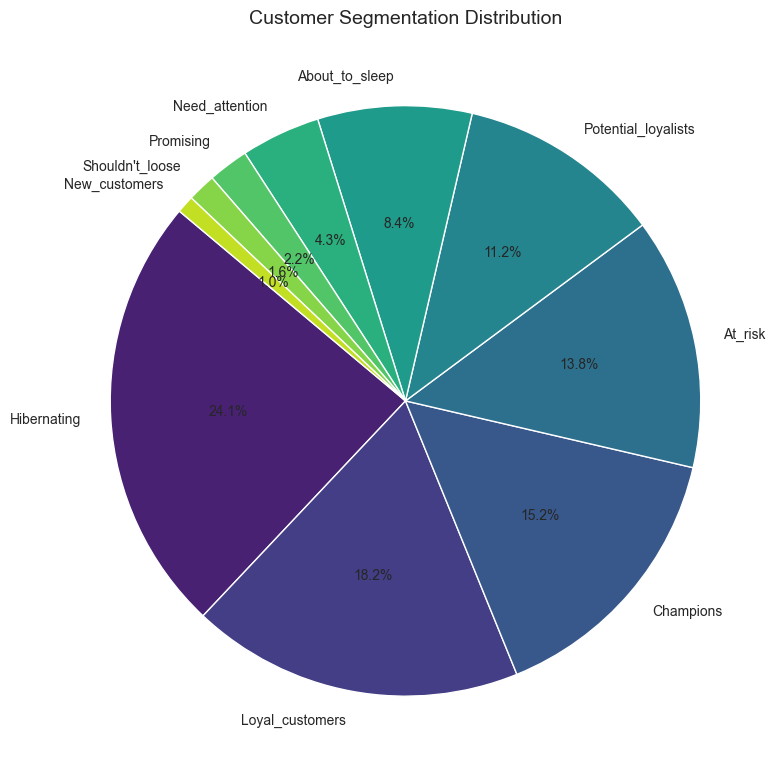

In [52]:
# Visualize segment distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(
    segment_summary['Count'],
    labels=segment_summary['Segment'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(segment_summary))
)
plt.title('Customer Segmentation Distribution', fontsize=14)
plt.tight_layout()
plt.show()

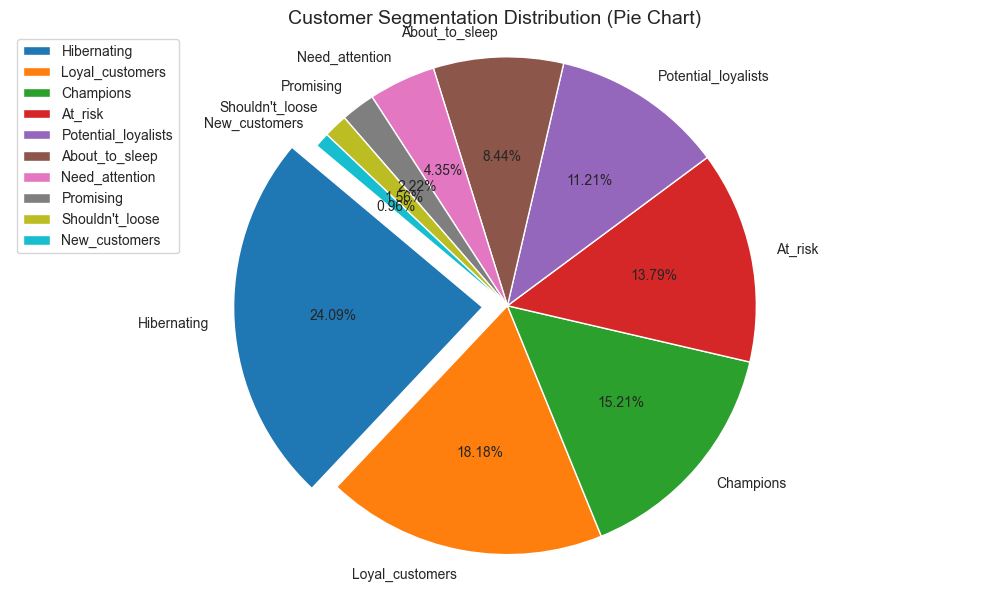

In [53]:
# Define the explode values for the pie chart
explode = [0.1 if i == 0 else 0 for i in range(len(segment_summary))]  # Explode the first segment

# Pie chart using matplotlib
plt.figure(figsize=(10, 6))
plt.pie(
    segment_summary['Count'],  # Data for the pie chart
    labels=segment_summary['Segment'],  # Segment names as labels
    autopct='%1.2f%%',  # Display percentages
    explode=explode,  # Explode the first segment
    startangle=140,  # Start angle for better alignment
    colors=plt.cm.tab10.colors[:len(segment_summary)]  # Color palette
)

# Add a legend and title
plt.title('Customer Segmentation Distribution (Pie Chart)', fontsize=14)
plt.legend(labels=segment_summary['Segment'], loc="best")
plt.tight_layout()  # Adjust layout
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


In [54]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count","sum"])

Recency               Frequency             Monetary  \
                       mean count     sum      mean count   sum     mean   
Segment                                                                    
About_to_sleep       52.046   369   19205     1.290   369   476  432.479   
At_risk             157.653   603   95065     3.313   603  1998  947.907   
Champions             5.075   665    3375    14.591   665  9703 6496.805   
Hibernating         217.221  1053  228734     1.202  1053  1266  374.892   
Loyal_customers      32.289   795   25670     7.991   795  6353 2697.408   
Need_attention       48.726   190    9258     2.637   190   501  784.815   
New_customers         6.238    42     262     1.000    42    42  375.262   
Potential_loyalists  15.571   490    7630     2.216   490  1086  678.297   
Promising            22.103    97    2144     1.000    97    97  300.261   
Shouldn't_loose     133.088    68    9050     9.824    68   668 2373.598   

                                       
                    count         sum  
Segment                                
About_to_sleep        369  159584.680  
At_risk               603  571587.702  
Champions             665 4320375.180  
Hibernating          1053  394760.981  
Loyal_customers       795 2144439.271  
Need_attention        190  149114.910  
New_customers          42   15761.000  
Potential_loyalists   490  332365.700  
Promising              97   29125.350  
Shouldn't_loose        68  161404.650

**Customer Segmentation Analysis and Recommendations**

**About to Sleep¶**
- Mean Recency: 52.046 days (369 customers)
- Mean Frequency: 1.289 (42 purchases)
- Mean Monetary Value:  432.478( Total: 159584.680)

Moderate recency and low frequency./ 
Recommendations:
- Send targeted campaigns highlighting relevant products.
- Use offers like "We miss you" discounts.
- Engage them through retargeting ads on social media.

**At_risk**
- Mean Recency: 157.653 days (603 customers)
- Mean Frequency: 3.313 (1998 purchases)
- Mean Monetary Value:  947.906( Total: 571587.702)

Previously frequent buyers who haven't purchased recently./

Recommendations:
- Use reactivation campaigns with targeted discounts.
- Send win-back emails with personalized product recommendations.
- Highlight limited-time offers to create urgency.

**Champions**
- Mean Recency: 5.075 days (665 customers)
- Mean Frequency: 14.590 (9703 purchases)
- Mean Monetary Value:  6496.804( Total: 4320375.180)

Recommendations:
- Offer exclusive rewards or VIP programs.
- Provide early access to new products or promotions.
- Request testimonials or reviews.
- Personalize communications to make them feel valued.

**Hibernating(Inactive Customers)**
- Mean Recency: 217.221 days (1053 customers)
- Mean Frequency: 1.202 (1266 purchases)
- Mean Monetary Value:  374.891( Total: 394760.981)

Recommendations:
- Reduce marketing efforts toward them unless they show reengagement.
- Send occasional newsletters to maintain minimal engagement.
- Consider offering a survey to understand why they stopped purchasing.

**Loyal_customers**
- Mean Recency: 32.289 days (795 customers)
- Mean Frequency: 7.991 (6353 purchases)
- Mean Monetary Value:  2697.407( Total: 2144439.271)

Recommendations:
- Offer loyalty discounts or tiered rewards.
- Encourage referrals through referral incentives.
- Send product recommendations based on past purchases.

**Need_attention**
- Mean Recency: 48.726 days (190 customers)
- Mean Frequency: 2.636 (501 purchases)
- Mean Monetary Value:  784.815( Total: 149114.910)

Recommendations:
- Highlight customer appreciation with special offers.
- Reengage with personalized product recommendations.
- Use surveys to gather feedback on their experience.

**New_customers**
- Mean Recency: 6.238 days (42 customers)
- Mean Frequency: 1.000 (476 purchases)
- Mean Monetary Value:  375.261( Total: 15761.000)

Recommendations:
- Focus on nurturing campaigns like welcome sequences.
- Offer first-time buyer discounts or perks.
- Educate them about your brand's values and products.

**Potential_loyalists**
- Mean Recency: 15.571 days (490 customers)
- Mean Frequency: 2.216 (1086 purchases)
- Mean Monetary Value:  678.297( Total: 332365.700)

Recommendations:
- Offer small rewards or free shipping on their next purchase.
- Engage them with nurturing campaigns like welcome emails.
- Highlight customer success stories to build trust.

**Promising**
- Mean Recency: 22.103 days (97 customers)
- Mean Frequency: 1.000 (97 purchases)
- Mean Monetary Value:  300.261( Total: 29125.350)

Recommendations:
- Encourage repeat purchases with "next purchase" discounts.
- Provide a great onboarding experience through welcome emails.
- Send curated product recommendations to increase engagement.

**Shouldn't_loose**
- Mean Recency: 133.088 days (68 customers)
- Mean Frequency: 9.823 (668 purchases)
- Mean Monetary Value:  2373.597( Total: 161404.650)

Recommendations:
- Call or email them personally to understand their concerns.
- Offer exclusive incentives to bring them back.
- Highlight the value of their loyalty with personalized messages.

In [55]:
rfm.to_csv('rfm.csv', index=False)

In [56]:
df = pd.read_csv('rfm.csv')
df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.000,325,2,0.000,1,2,1,12,Hibernating
1,12347.000,2,7,4310.000,5,4,5,54,Champions
2,12348.000,75,4,1797.240,2,3,4,23,At_risk
3,12349.000,18,1,1757.550,4,1,4,41,Promising
4,12350.000,310,1,334.400,1,1,2,11,Hibernating


In [57]:
df.drop(['R_Score', 'F_Score', 'M_Score', 'Segment', 'RFM_Score' , 'CustomerID'], axis=1, inplace=True)

# Kmeans

In [58]:
df.head()

,Recency,Frequency,Monetary
0,325,2,0.000
1,2,7,4310.000
2,75,4,1797.240
3,18,1,1757.550
4,310,1,334.400


In [59]:
X = df
X.head()

,Recency,Frequency,Monetary
0,325,2,0.000
1,2,7,4310.000
2,75,4,1797.240
3,18,1,1757.550
4,310,1,334.400


In [60]:
X.shape

(4372, 3)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
X = X_scaled
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [63]:
kmeans.labels_

array([1, 3, 3, ..., 3, 3, 3])

In [71]:
y_pred = kmeans.labels_

In [72]:
def assign_truth_labels(row):
    if row['Recency'] <= 30 and row['Frequency'] > 10 and row['Monetary'] > 500:
        return 0  # Champions
    elif row['Recency'] > 90 and row['Frequency'] <= 5:
        return 1  # At Risk
    elif row['Recency'] <= 90 and row['Frequency'] > 5 and row['Monetary'] <= 500:
        return 2  # Loyal Customers
    else:
        return 3  # Others

df['Truth_Label'] = df.apply(assign_truth_labels, axis=1)
y_true = df['Truth_Label']


In [ ]:
adjusted_rand_score(y_true, y_pred)

0.5901539896092609

## Hopkins test

In [ ]:
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [65]:
df.head()

,Recency,Frequency,Monetary
0,325,2,0.000
1,2,7,4310.000
2,75,4,1797.240
3,18,1,1757.550
4,310,1,334.400


In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X = X_scaled
X.shape

(4372, 3)

In [67]:
hopkins(X, X.shape[0])

0.008113066673388717

In [68]:
hopkins(X, 1000)

0.00957768912963629

## Choosing The Optimal Number of Clusters

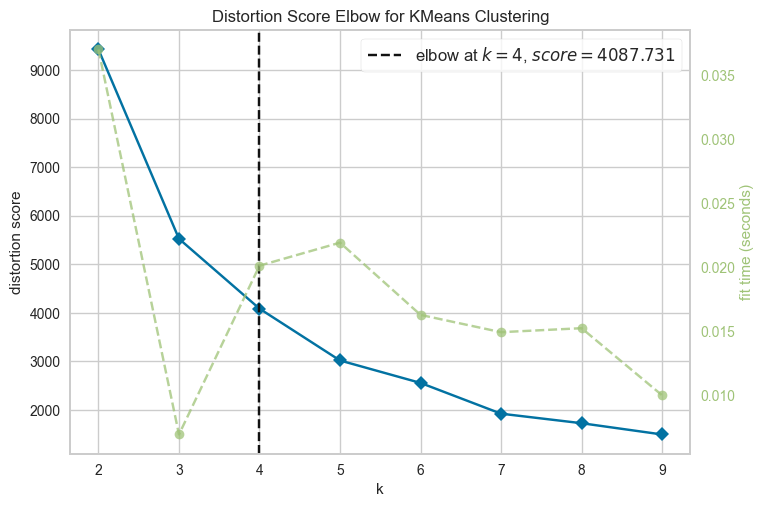

In [ ]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 
visualizer.fit(X)       
visualizer.show();

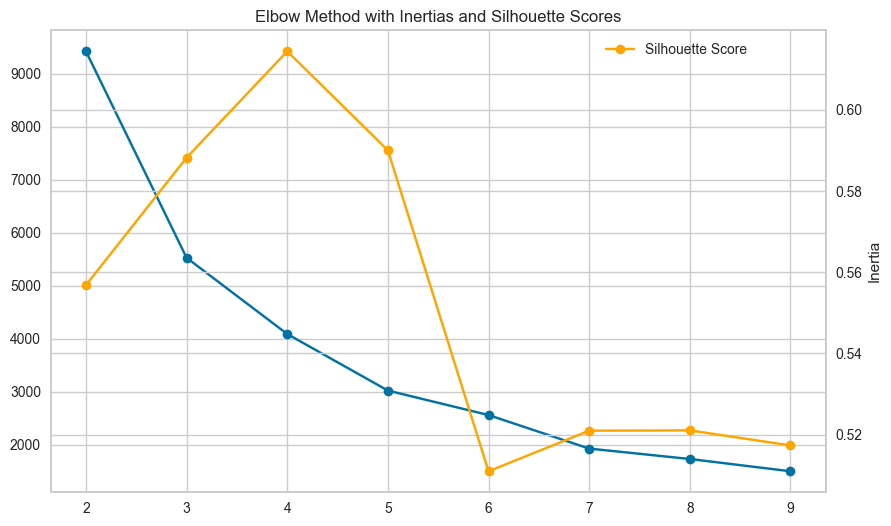

In [ ]:
# Elbow + Silhoutee score
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
    
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))

# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

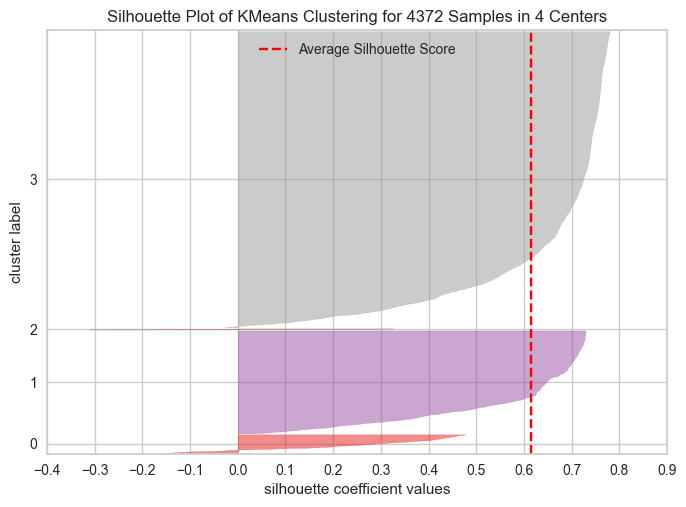

In [ ]:
model3 = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# Cohort Analysis

In [82]:
df0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.850,12680.000,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.100,12680.000,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.150,12680.000,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.150,12680.000,France


In [83]:
df0.dropna(inplace=True)

In [85]:
df0['Total_Price'] = df0['Quantity'] * df0['UnitPrice']

In [86]:
df0.drop([ 'Description', 'Country', 'Quantity', 'UnitPrice'], axis=1, inplace=True)

In [87]:
df0.head()

,InvoiceNo,StockCode,InvoiceDate,CustomerID,Total_Price
0,536365,85123A,2010-12-01 08:26:00,17850.000,15.300
1,536365,71053,2010-12-01 08:26:00,17850.000,20.340
2,536365,84406B,2010-12-01 08:26:00,17850.000,22.000
3,536365,84029G,2010-12-01 08:26:00,17850.000,20.340
4,536365,84029E,2010-12-01 08:26:00,17850.000,20.340


In [88]:
# Convert 'InvoiceDate' column to datetime format
df0['InvoiceDate']= pd.to_datetime(df0['InvoiceDate'])

In [89]:
df0.head()

,InvoiceNo,StockCode,InvoiceDate,CustomerID,Total_Price
0,536365,85123A,2010-12-01 08:26:00,17850.000,15.300
1,536365,71053,2010-12-01 08:26:00,17850.000,20.340
2,536365,84406B,2010-12-01 08:26:00,17850.000,22.000
3,536365,84029G,2010-12-01 08:26:00,17850.000,20.340
4,536365,84029E,2010-12-01 08:26:00,17850.000,20.340


In [90]:
# Create a helper DataFrame with each customer’s first purchase date
first_purchase = df0.groupby('CustomerID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']

# Merge this back to the original DataFrame
df0 = pd.merge(df0, first_purchase, on='CustomerID')

In [91]:
# Extract the cohort month and store that as the “CohortMonth.”

df0['CohortMonth'] = df0['FirstPurchaseDate'].dt.to_period('M') # the month in which that customer first purchased

# Define a “TransactionMonth” by truncating or converting InvoiceDate into year‐month format as well.

df0['TransactionMonth'] = df0['InvoiceDate'].dt.to_period('M')

In [92]:
df0['TransactionMonth'] = df0['InvoiceDate'].dt.to_period('M')

We want to see how many months have passed since the cohort’s “birth.”


One way is to convert periods into integer representations and then find the difference.

In [93]:
# Convert 'CohortMonth' and 'TransactionMonth' to integer in the format YYYYMM
df0['CohortMonth_int'] = df0['CohortMonth'].apply(lambda x: x.year * 100 + x.month)
df0['TransactionMonth_int'] = df0['TransactionMonth'].apply(lambda x: x.year * 100 + x.month)

# CohortIndex is how many months since the first purchase
df0['CohortIndex'] = df0['TransactionMonth_int'] - df0['CohortMonth_int'] + 1

if a customer’s first purchase was in December 2010 (cohortMonth_int might be 24140 in period code), and the transaction was in February 2011 (transactionMonth_int = 24142, for example), CohortIndex = 3

In [97]:
df0.sample(5)

,InvoiceNo,StockCode,InvoiceDate,CustomerID,Total_Price,FirstPurchaseDate,CohortMonth,TransactionMonth,CohortMonth_int,TransactionMonth_int,CohortIndex
288947,570488,21411,2011-10-10 17:12:00,14096.000,8.290,2011-08-30 10:49:00,2011-08,2011-10,201108,201110,3
68884,545186,21671,2011-02-28 15:05:00,17841.000,5.000,2010-12-01 14:30:00,2010-12,2011-02,201012,201102,91
102725,549262,21731,2011-04-07 12:38:00,14465.000,3.300,2011-02-10 12:13:00,2011-02,2011-04,201102,201104,3
279593,569670,21901,2011-10-05 13:47:00,14730.000,0.650,2011-03-08 12:49:00,2011-03,2011-10,201103,201110,8
1928,536594,85123A,2010-12-01 17:22:00,15235.000,17.700,2010-12-01 17:22:00,2010-12,2010-12,201012,201012,1


**Build the Cohort Pivot Table**


Counting the number of unique customers in each cohort for each CohortIndex.

This reveals how many customers from the cohort remain active (purchasing) in month 1, month 2, etc.

In [95]:
# Create a grouping by CohortMonth and CohortIndex
grouping = df0.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot so that each row is one CohortMonth, and the columns are the CohortIndex
cohort_counts = grouping.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,90,91,92,93,94,95,96,97,98,99,100,101
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,
2010-12,948.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.000,317.000,367.000,341.000,376.000,360.000,336.000,336.000,374.000,354.000,474.000,260.000
2011-01,421.000,101.000,119.000,102.000,138.000,126.000,110.000,108.000,131.000,146.000,155.000,63.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,380.000,94.000,73.000,106.000,102.000,94.000,97.000,107.000,98.000,119.000,35.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,440.000,84.000,112.000,96.000,102.000,78.000,116.000,105.000,127.000,39.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,299.000,68.000,66.000,63.000,62.000,71.000,69.000,78.000,25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,279.000,66.000,48.000,48.000,60.000,68.000,74.000,29.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,235.000,49.000,44.000,64.000,58.000,79.000,24.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.000,40.000,39.000,44.000,52.000,22.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.000,42.000,42.000,42.000,23.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Calculate Retention Rates**

To get retention rates, typically divide each CohortIndex column by the size of the cohort in the first month.

In [100]:
cohort_sizes = cohort_counts.iloc[:, 0]  # the first column = month 1 of each cohort
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

# This gives us a table of proportions representing what fraction of the original cohort is active in each subsequent month

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,90,91,92,93,94,95,96,97,98,99,100,101
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,
2010-12,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.500,0.274
2011-01,1.000,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,1.000,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,1.000,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,1.000,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,1.000,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,1.000,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.000,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.000,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
cohort_revenue = df0.groupby(['CohortMonth', 'CohortIndex'])['Total_Price'].sum().reset_index()
revenue_pivot = cohort_revenue.pivot(index='CohortMonth', columns='CohortIndex', values='Total_Price')
revenue_pivot


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,90,91,92,93,94,95,96,97,98,99,100,101
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,
2010-12,554604.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271616.520,230856.220,302509.390,200927.980,321611.710,312894.360,303907.310,310882.670,466580.680,438835.910,510982.230,182814.950
2011-01,203457.860,56168.550,62264.880,41516.170,82313.310,84009.540,70218.500,72886.270,74430.631,104181.160,122027.200,27850.510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,149521.380,25260.260,37456.250,45852.340,35666.690,31081.740,47665.320,55840.130,51861.550,60544.860,9366.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,189930.080,26383.200,53693.950,40324.050,46759.970,38360.360,60622.280,61705.530,65303.870,11252.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,119764.251,28921.030,24928.060,23892.080,26006.540,29653.290,28223.830,33889.780,6292.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,115858.740,17663.950,18876.660,17888.890,26591.530,32951.520,31401.900,10629.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,92526.510,13619.350,13893.450,29925.030,25835.740,39764.290,7925.610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,65882.871,11126.270,15395.710,17222.510,19329.060,6056.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,77658.230,19122.500,33061.560,39925.010,14143.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


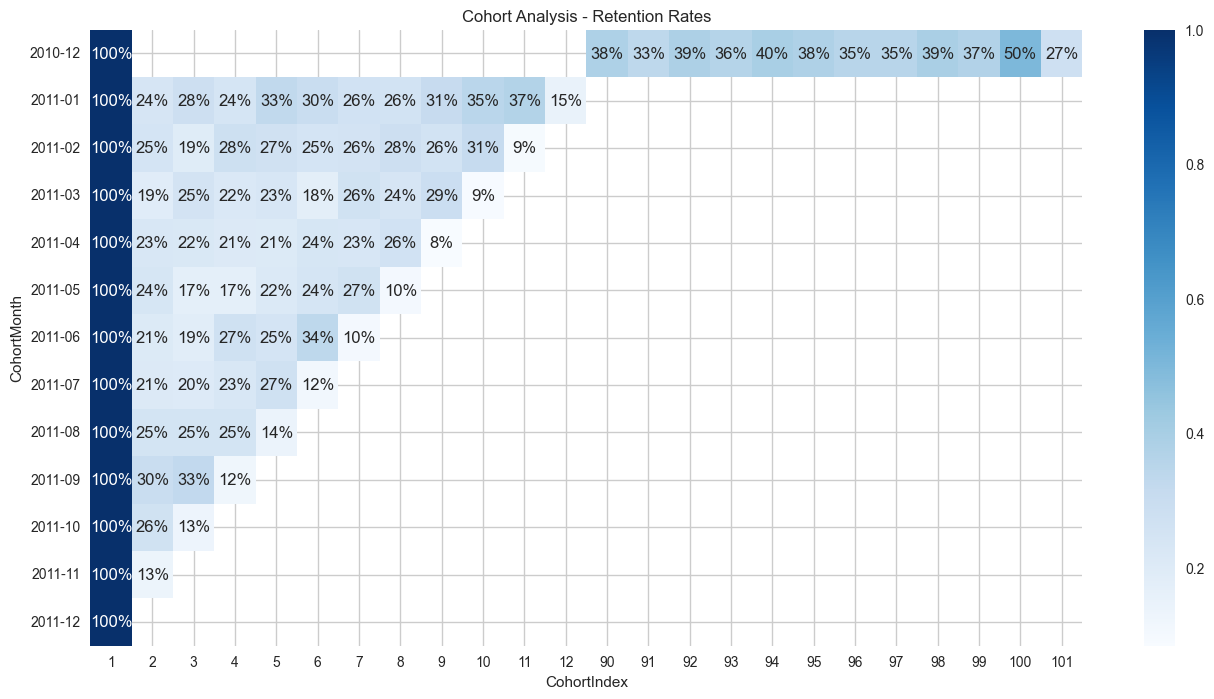

In [104]:
plt.figure(figsize=(16, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis - Retention Rates')
plt.show()

This cohort analysis successfully provided insights into customer retention and behavioral trends over time. By grouping customers based on their first purchase date and analyzing their subsequent transactions, we observed how engagement and retention evolve for different cohorts. Key takeaways from the analysis include:

- Retention Trends: The retention rates highlight periods where customers are more likely to drop off, helping us identify opportunities to improve customer loyalty strategies.

- Cohort Performance: The analysis revealed which cohorts had higher retention or spending levels, allowing us to understand the impact of specific periods, marketing campaigns, or external factors.

- Customer Lifecycle Understanding: By analyzing the average time customers remain active, we gained a better understanding of their lifecycle, which can guide future business planning and decision-making.

- Revenue and Value Insights: Examining monetary metrics alongside retention allowed us to identify the most valuable customer groups and periods that drive revenue growth.

This analysis provides actionable insights that can inform targeted retention initiatives, customer engagement strategies, and future business decisions. Regularly performing such analyses will help track the effectiveness of implemented changes and foster a deeper understanding of customer behavior over time.